# Лабораторная работа №1.

## Условие

Вариант №14.

Распределения: 

$$\mathbf{X_1} \sim R(0, 10)$$

$$\mathbf{X_2} \sim N(5, 3)$$

Объёмы выборок:

$$ n_1 = 200$$

$$ n_2 = 250 $$


Статистическая гипотеза $H_0$:

$$m_1 = 5 \ (\sigma_1\text{ -известна})$$

## Импорты

In [6]:
from scipy import stats # функции из мат статистики 
import numpy as np  
from math import sqrt 


from time import time # для времени 
from IPython.display import display, Math, Markdown  # для вывода формул
import matplotlib.pyplot as plt # для графиков

##  Данные

In [7]:
a1, b1, n1 = 0, 10, 200
m, sig, n2 = 5, 3, 250

In [8]:
def printf(*strings):
    for s in strings:
        display(Markdown(s))

# для латех вывода
np.random.seed(int(time()))
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

In [9]:
X1 = np.random.uniform(a1, b1, n1)
X2 = np.random.normal(loc = m,scale=sig,size=n2)

printf(f"$\\mathbf{{X1}}$: {X1[:10].round(2)}")
printf(f"$\\mathbf{{X2}}$: {X2[:10].round(2)}")

$\mathbf{X1}$: [8.35 9.65 2.92 1.55 5.81 9.58 3.59 2.67 1.25 6.65]

$\mathbf{X2}$: [ 8.51  7.16 -0.8  -0.19  2.79  5.63  2.83  9.39  6.44  4.14]

### Выборочные характеристики

Мы имеем выборку, нам нужно рассчитать **несмещенную** оценку с.к.о. и дисперсии, поэтому применяем формулы:

$$ s_{1} = \sqrt{\dfrac{1}{n - 1} \sum\limits_{i = 1}^{n} (x_i - \overline{x})^2} $$
$$ s^2_{1} = \dfrac{1}{n - 1} \sum\limits_{i = 1}^{n} (x_i - \overline{x})^2 $$

$$ s_{2} = \sqrt{\dfrac{1}{n - 1} \sum\limits_{i = 1}^{n} (x_i - \overline{x})^2} $$
$$ s^2_{2} = \dfrac{1}{n - 1} \sum\limits_{i = 1}^{n} (x_i - \overline{x})^2 $$

Множитель $\dfrac{1}{n - a}$  в `numpy` достигается передачей параметра `ddof=a`, в данном случае `ddof=1`. 

In [11]:
mean1 = X1.mean()
s1 = X1.std(ddof=1)
S1 = X1.var(ddof=1)

mean2 = X2.mean()
s2 = X2.std(ddof=1)
S2 = X2.var(ddof=1)

X_pooled = np.concatenate((X1, X2)) #обьединенная выборка
mean_pooled = X_pooled.mean()
s_pooled = X_pooled.std(ddof=1)
S_pooled = X_pooled.var(ddof=1)

printf(
    f"$\\overline{{x_1}} =$ {mean1:.2f}, $s_1^2 =$ {S1:.2f}, $s_1$ = {s1:.2f}, $n_1 =$ {n1}"
)
printf(
    f"$\\overline{{x_2}} =$ {mean2:.2f}, $s_2^2 =$ {S2:.2f}, $s_2$ = {s2:.2f}, $n_2 =$ {n2}"
)

printf(
    f"$\\overline{{x_{{pooled}}}} =$ {mean_pooled:.2f}, $s_{{pooled}}^2 =$ {S_pooled:.2f}, $s_{{pooled}}$ = {s_pooled:.2f}, $n_{{pooled}} =$ {n1 + n2}",
)

$\overline{x_1} =$ 5.39, $s_1^2 =$ 8.01, $s_1$ = 2.83, $n_1 =$ 200

$\overline{x_2} =$ 4.90, $s_2^2 =$ 7.82, $s_2$ = 2.80, $n_2 =$ 250

$\overline{x_{pooled}} =$ 5.11, $s_{pooled}^2 =$ 7.95, $s_{pooled}$ = 2.82, $n_{pooled} =$ 450

## 2. Однопараметрические критерии

В предыдущих заданиях мы генерировали выборку по какому-то распределению. Далее мы будем работать над проверкой гипотез. Поэтому будем считать верной нулевую гепотезу 

Тогда ошибка может быть только 1-го рода: мы даём верную гипотезу, а потом проверяем ее.

In [56]:
m0 = 5
alpha = 0.05
std0 = 2.88


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

### z-test

Используем, когда в H₀ проверяем среднее, а σ считается **известной**.
Для X₂ ~ R(0, 10) берём σ = 2.83, нулевая гипотеза ставится истинной:

H₀: μ = m₀ = 5.



$$ Z = \dfrac{\overline{X} - m_0}{\frac{\sigma}{\sqrt{n}}} $$

Так как критическая область двусторонняя,потому что нас интересуют оба направления отклонения среднего от m0— как в сторону больше, так и меньше. При верной H0 статистика, то выражение для $p$ value примет вид:
$$ p = 2\min(F_Z(z_{выб} \mid H_0), 1 - F_Z(z_{выб} \mid H_0)) $$

In [57]:
def ztest(X, value, std):
    mean = X.mean()
    n = len(X)
    Z = (mean-value)/(std/sqrt(n))
    
    cdf = stats.norm.cdf(Z)
    p_value = 2*min(cdf,1-cdf)
    return Z,p_value
    
    

В этом случае $H_0 = m_0 = 5$ - я  предположил, что математическое ожидание распределения по выборке действительно совпадает с математическим ожиданием равномерного распределения при таких параметрах 

In [68]:
z, p_value = ztest(X1, m0, std0)

printf(
    r"### Z-test",
    f"$H_0: m_1 = m_0 = {m0}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### Z-test

$H_0: m_1 = m_0 = 5$

$z_{выб} =$ 1.89

$p =$ 0.06

$H_0$ принимается

### t-test

**t-test (одновыборочный)**

Используем, когда σ **неизвестна** (заменяем на s). Для X₁ ~ R(0,10):

H₀: μ = m₀ = 5.

Статистика:
T = ( X̄ − m₀ ) / ( s / √n ),  при нормальности: T ~ t_{n−1}.

Двусторонний p-value берётся из t-распределения (функция `stats.ttest_1samp`).


In [71]:
t_stat, p_value = stats.ttest_1samp(X1, m0)

printf(
    r"### T-test",
    f"$H_0: m = m_0 = {m0}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value),
)

### T-test

$H_0: m = m_0 = 5$

$z_{выб} =$ 1.89

$p =$ 0.06

$H_0$ принимается

### $\chi^2$-test ($m$ известно)

Мы используем данную статистику критерия, когда основная гипотеза $H_0$ связана со значением $\sigma$ распределения, из которого мы взяли выборку. При этом $m$ считается известной.



$$ Z = \dfrac{n \cdot S_0^2}{\sigma_0^2} $$

$$ S_0^2 = \frac{1}{n} \cdot \sum\limits_{i=1}^{n} (X_i - m)^2 $$

Так как критическая область двусторонняя($Z$ не сильно должно отличаться от $n$ при истинности $H_0$):
$$ p = 2\min(F_Z(z_{выб} \mid H_0), 1 - F_Z(z_{выб} \mid H_0)) $$

In [72]:
def S_0(X, m): 
    return np.mean((X - m) ** 2)


def chisquare(X, value, m):
    n = len(X)
    z = n * S_0(X, m) / value**2
    cdf = stats.chi2.cdf(z, n)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [73]:
z, p_value = chisquare(X1, std0, m0)
printf(
    r"### $\chi^2$-test ($m$ известно)",
    f"$H_0: \\sigma = \\sigma_0 = {std0:.2f}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### $\chi^2$-test ($m$ известно)

$H_0: \sigma = \sigma_0 = 2.88$

$z_{выб} =$ 195.86

$p =$ 0.86

$H_0$ принимается

### $\chi^2$-test ($m$ неизвестно)

Отличается от $\chi^2$-test c известным $m$ тем, что считается выборочное значение $m$ под капотом. 


In [74]:
def chisquare(X, value):
    n = len(X)
    z = (n - 1) * X.var(ddof=1) / value**2
    cdf = stats.chi2.cdf(z, n - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [75]:
z, p_value = chisquare(X1, std0)

printf(
    r"### $\chi^2$-test ($m$ неизвестно)",
    f"$H_0: \\sigma_1 = \\sigma_0 = {std0:.2f}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value),
)

### $\chi^2$-test ($m$ неизвестно)

$H_0: \sigma_1 = \sigma_0 = 2.88$

$z_{выб} =$ 192.28

$p =$ 0.76

$H_0$ принимается

## 3. Двухвыборочные критерии

### 2-sample t-test

In [76]:
z, p_value = stats.ttest_ind(X1, X2)

printf(
    r"### 2-sample t-test",
    f"$H_0: m_1 = m_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### 2-sample t-test

$H_0: m_1 = m_2$

$z_{выб} =$ 1.83

$p =$ 0.07

$H_0$ принимается

### 2-sample F-test ($m$ известно)

In [77]:
def Ftest(X1, X2, m1, m2):
    n1 = len(X1)
    n2 = len(X2)
    z = S_0(X1, m1) / S_0(X2, m2)
    cdf = stats.f.cdf(z, dfn=n1, dfd=n2)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [78]:
z, p_value = Ftest(X1, X2, m0, m0)

printf(
    r"### 2-sample F-test ($m$ известно)",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### 2-sample F-test ($m$ известно)

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 1.04

$p =$ 0.76

$H_0$ принимается

### 2-sample F-test ($m$ неизвестно)

In [79]:
def Ftest(X1, X2):
    n1 = len(X1)
    n2 = len(X2)
    z = X1.var(ddof=1) / X2.var(ddof=1)
    cdf = stats.f.cdf(z, dfn=n1 - 1, dfd=n2 - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [80]:
z, p_value = Ftest(X1, X2)

printf(
    r"### 2-sample F-test ($m$ неизвестно)",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### 2-sample F-test ($m$ неизвестно)

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 1.02

$p =$ 0.85

$H_0$ принимается

## 4. Исследование распределений статистик критерия

Статистическая гипотеза $H_0$: $m_1 = 5 \ (\sigma_1\text{ -известна})$

Формула расчёта статистики критерия $Z$: $Z = \dfrac{\overline{X} - m_0}{\frac{\sigma}{\sqrt{n}}}$

Формула расчёта статистики $P$-value: $p = 2\min(F_Z(z_{выб} \mid H_0), 1 - F_Z(z_{выб} \mid H_0))$

Число серий экспериментов $N = 1000$

### Теоретические характеристики:

| СВ           | Распределение в условиях $H_0$ | Параметры | Математическое ожидание | Дисперсия    | С.к.о |
| ------------ | ------------------------------ | --------- | ----------------------- | ------------ | ----- |
| $\mathbf{Z}$ | N(0, 1)                        |           | 0                       | 1            | 1     |
| $P$-value    | R(0, 1)                        |   a = 0, b = 1        | $\frac{1}{2}$           | $\frac{1}{12} \sim 0.083$ | $\frac{1}{\sqrt{12}} \sim 0.288 $ |


### Выборочные характеристики

In [86]:
N = 1000
Z = np.empty(N)
P = np.empty(N)
for i in range(N):
    X = np.random.uniform(a1, b1, n1)
    z, p_value = ztest(X, m0, std0)
    Z[i] = z
    P[i] = p_value

printf(f"$\\mathbf{{Z}}$: {Z[:10].round(2)}")
printf(f"$\\mathbf{{P-value}}$: {P[:10].round(2)}")

$\mathbf{Z}$: [ 0.55  1.02 -0.21  0.56  0.13  0.04  0.   -0.49 -0.9  -1.09]

$\mathbf{P-value}$: [0.59 0.31 0.84 0.58 0.9  0.97 1.   0.63 0.37 0.27]

In [87]:
mean_z = Z.mean()
sz = Z.std(ddof=1)
Sz = Z.var(ddof=1)

mean_p = P.mean()
sp = P.std(ddof=1)
Sp = P.var(ddof=1)

printf(
    f"$\\overline{{Z}} =$ {mean_z:.2f}, $s_Z^2 =$ {Sz:.2f}, $s_Z$ = {sz:.2f}"
)
printf(
    f"$\\overline{{P-value}} =$ {mean_p:.2f}, $s_P^2 =$ {Sp:.2f}, $s_P$ = {sp:.2f}"
)

$\overline{Z} =$ 0.02, $s_Z^2 =$ 0.98, $s_Z$ = 0.99

$\overline{P-value} =$ 0.51, $s_P^2 =$ 0.08, $s_P$ = 0.29

### Графики

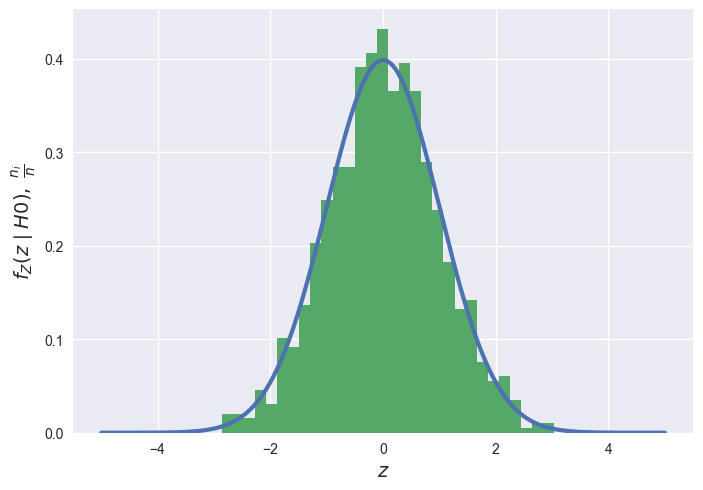

In [88]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False  

X = np.linspace(-5, 5, 1000) # Точки по оси x для теоретической кривой N(0,1)
standard = stats.norm(loc=0, scale=1)# Определяем стандартное нормальное распределение N(0,1)
pdf = standard.pdf(X) # Теоретическая плотность N(0,1) в точках X

plt.plot(X, pdf, lw=3) # Рисуем теоретическую кривую плотности N(0,1)

# Рисуем гистограмму эмпирических значений Z (должен быть массив Z),
# bins=30 — число столбиков; density=True — нормировка к плотности (площадь = 1)
plt.hist(Z, bins=30, density=True)

# Подписи осей (лучше писать H_0 как индекс: H_0)
plt.ylabel(r"$f_Z(z \mid H0),\ \frac{n_i}{n}$", fontsize=14)
plt.xlabel("$z$", fontsize=14)

plt.show()

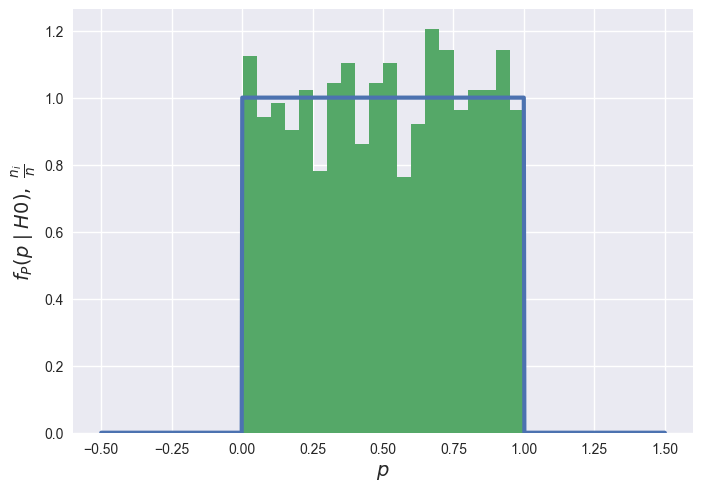

In [89]:
X = np.linspace(-0.5, 1.5, 1000)
uniform = stats.uniform(loc=0, scale=1)
pdf = uniform.pdf(X)

plt.plot(X, pdf, lw=3)

plt.hist(P, bins=20, density=True)

plt.ylabel(r"$f_P(p \mid H0),\ \frac{n_i}{n}$", fontsize=14)
plt.xlabel("$p$", fontsize=14)

plt.show()